## Cifar Image Classification with Keras

### Part1. Data Preprocessing

#### 1. Cifar10 데이터 가져오기

In [77]:
from keras.datasets import cifar10

In [78]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(X_train.shape) # 5만개, 32x32 이미지 크기, 3 rgb채널값
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [79]:
print(y_train[:9]) # 카테고리화 해놓은 값으로

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]]


In [80]:
print(X_train[0]) # numpy array 형태로 이미지를 배열로 표현

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [81]:
class_name = ('Airplane','Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Boat', 'Truck')

#### 2. 이미지 확인

In [82]:
import matplotlib.pyplot as plt
import PIL #파이썬 이미지 라이브러리
import numpy as np

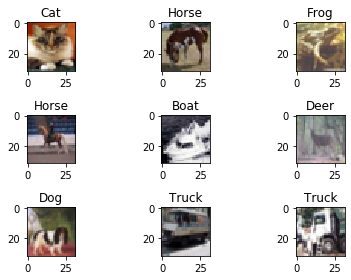

In [83]:
ROW = 3
COLUMN = 3

image_indexes = np.random.choice(len(np.array(X_train)), ROW * COLUMN) 

for i in range(ROW * COLUMN):
    label_index = ((y_train[image_indexes][i])[0])
    plt.subplot(ROW, COLUMN, 1+i)
    plt.imshow(PIL.Image.fromarray(X_train[image_indexes][i]))
    plt.title("%s" % class_name[label_index])

plt.tight_layout()
plt.show()

#### 3. 데이터 전처리

In [84]:
# 이미지 전처리 : Normalize 0-255 -> 0~1

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train/255
X_test = X_test/255



In [85]:
# Label 전처리 : Categorical
import keras.utils as utils

y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

In [86]:
print(y_train[:9])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


In [87]:
print(y_train.shape)

(50000, 10)


### part2. Train Model

#### 4. CNN Model 생성 (네트워크 구성 - 머리부분)

In [88]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Activation, Flatten,Dropout #이미지가 2D, Dropout - 오버포팅을 제거하기 위해 특정값을 껐다 켰다 해준다
from keras import optimizers

#네트워크 쌓기
model = Sequential()
# input layer = input shape 입력!!
model.add(Conv2D(8, (3,3), input_shape=(32, 32, 3), padding='same'))# 2의 배수로 원하는 필터 값 생성 32x32 사이즈 이미지이기때문에 32보다 작은 수로 필터
model.add(Activation('relu'))

# hidden layers
model.add(Conv2D(16, (3,3), padding='same')) #Conv2D는 원래 값보다 커지는것이 좋다, input_shape는 앞에서 정의한 내용이 그대로 반영되있다.
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3), padding = 'same'))
model.add(Activation('relu'))

model.add(Flatten())
# output layer = 출력 데이터 입력 
model.add(Dense(10, activation = 'softmax'))

In [89]:
# Optimizer
sgd = keras.optimizers.SGD(lr=0.01, momentum = 0.0, decay = 0.0) #lr learning rate  학습 속도 보통 0.01, momentum 운동량 0.0 (다리 부분)

# Cost Function
model.compile(loss='categorical_crossentropy',optimizer=sgd, metrics=['accuracy']) # 몸통 부분의 목표함수 설정파트

In [90]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 32, 32, 8)         224       
_________________________________________________________________
activation_13 (Activation)   (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 32, 32, 16)        1168      
_________________________________________________________________
activation_14 (Activation)   (None, 32, 32, 16)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 16, 32)        4640      
__________

#### 5. 모델 훈련

In [96]:
batch_size = 128 # 문제 확인 후 결과 값 확인
epochs = 20 # 전체 문제 푸는 반복 횟수

history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size = batch_size,
                    verbose=1,
                    validation_data=(X_test, y_test),
                    shuffle = True) #epochs가 한번 돌때마다 모델의 정확도

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 67s 1ms/step - loss: 1.0933 - acc: 0.6164 - val_loss: 1.1062 - val_acc: 0.6128
Epoch 2/20
50000/50000 [==============================] - 66s 1ms/step - loss: 1.0793 - acc: 0.6229 - val_loss: 1.1152 - val_acc: 0.6069
Epoch 3/20
50000/50000 [==============================] - 67s 1ms/step - loss: 1.0620 - acc: 0.6277 - val_loss: 1.1016 - val_acc: 0.6171
Epoch 4/20
50000/50000 [==============================] - 66s 1ms/step - loss: 1.0465 - acc: 0.6335 - val_loss: 1.0699 - val_acc: 0.6313
Epoch 5/20
50000/50000 [==============================] - 66s 1ms/step - loss: 1.0325 - acc: 0.6419 - val_loss: 1.0711 - val_acc: 0.6261
Epoch 6/20
50000/50000 [==============================] - 66s 1ms/step - loss: 1.0183 - acc: 0.6436 - val_loss: 1.1098 - val_acc: 0.6080
Epoch 7/20
50000/50000 [==============================] - 66s 1ms/step - loss: 1.0034 - acc: 0.6503 - val_loss: 1.0612 - val_acc

### Part3. 훈련과정 살펴보기

In [113]:
# 모델 평가하기
score = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy : % .2f%%" % (score[1]*100))

Accuracy :  66.34%


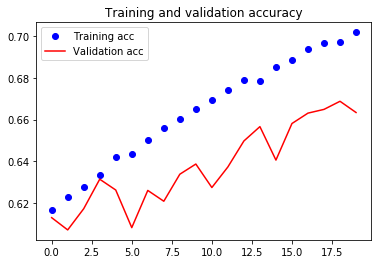

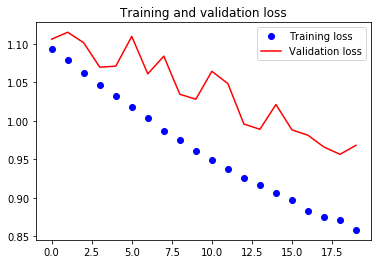

In [98]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Part4. Test Model

### 7. 랜덤 이미지 테스트 

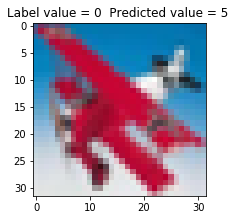

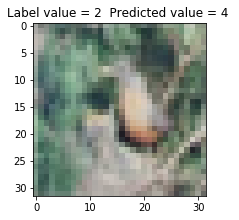

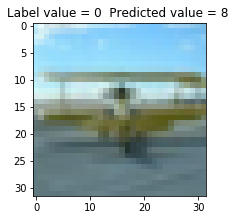

In [114]:
for index in np.random.choice(len(y_test), 3, replace = False):
    predicted = model.predict(X_test[index:index + 1])[0]
    label = y_test[index]
    result_label = np.where(label == np.amax(label))
    result_predicted = np.where(predicted == np.amax(predicted))

    title = "Label value = %d  Predicted value = %d " % (result_label[0],  result_predicted[0])
    fig = plt.figure(1, figsize = (3,3))
    ax1 = fig.add_axes((0,0,.8,.8))
    ax1.set_title(title)
    images = X_test
    plt.imshow(images[index], cmap = plt.cm.gray_r, interpolation = 'nearest')
    plt.show()

### Part5. Save Model

In [111]:
model.save('cifar10_classifier.h5') # h5가 케라스의 확장자명
#모바일에서 사용하기 위해서는 tensorflow lite, ONNX 등으로 저장해서 사용